In [ ]:
NAME = "Esther"
COLLABORATORS = "Yufei, Ha"

---

# CS110 Assignment 3 - Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

For details on how to create a nice PDF from a Jupyter notebook, refer again to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1).

### HCs and LOs for this assignment
[#responsibility], [#PythonProgramming], [#CodeReadability], [#DataStructures], [#ComplexityAnalysis], [#ComputationalCritique]

## Question 0

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 10 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

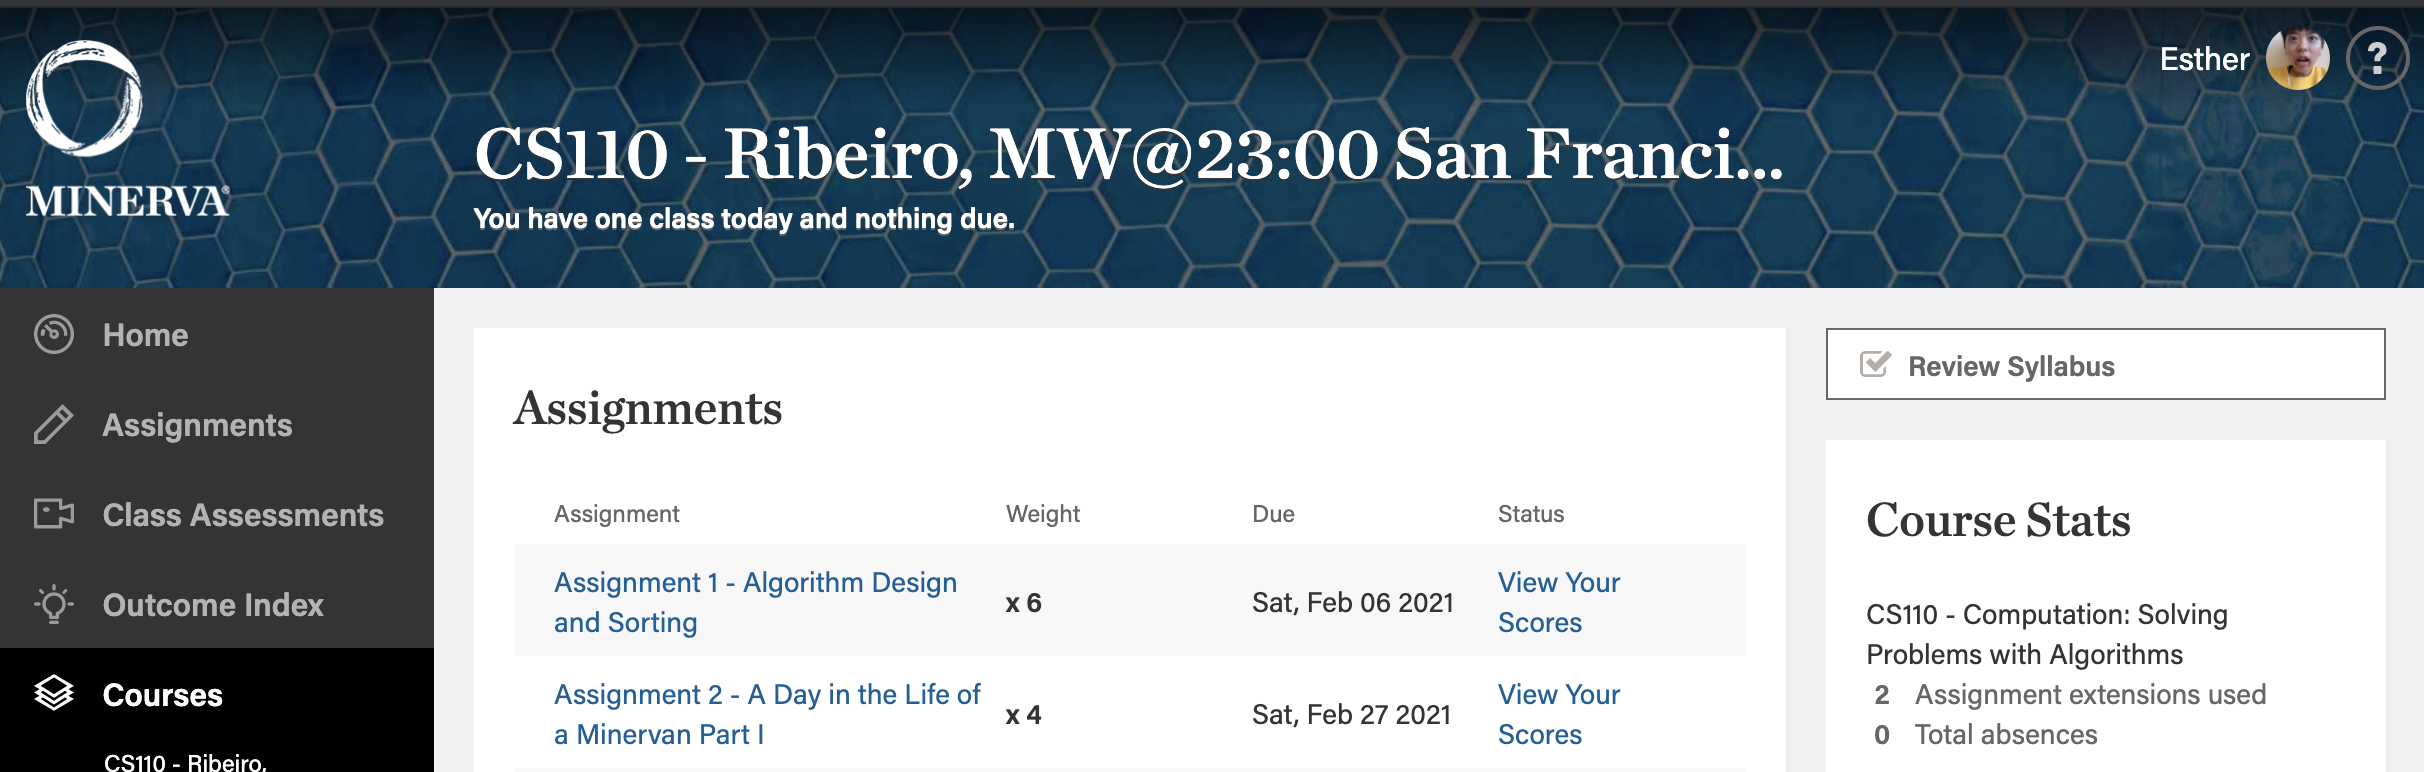

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:


- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.


The pro for using a Tree + Node class is to recycle or class and improve code readability. If we want to create another tree, we don't know to create all properties for nodes again because Node and Tree classes are separated. In addition, Node class indiciates the node in the tree, and all the methods in the tree implies we are changing the structure of the tree. This makes understanding the code much more easier. For instance, putting word_list in the init of Tree class, but not Node class is much more intuitive because we are putting the characters of words inside a tree.

The pro for using a Node class might be more direct and cohesive, because we put all the things together. The entity we will be looking here, will be a node and its relationship between its parents and children.

I will start from Tree+Node class because I think it is easier for me to start, think, and code.



### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [20]:
# VERSION 1 - Node + Trie classes

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        self.child = []
        self.parent  = None 
        self.char = char
        self.end_word = False #check if it is end of word 

      
class Trie_Q1():
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.word_list = word_list
        self.root = Node(None) #an empty root node (no character inside)
        if self.word_list: #if there is words in the wordlist 
          for word in self.word_list:
            word = word.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("*", "")
            self.insert(word) 

    def insert(self, word):
      """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
      """
      word = word.lower()
      current = self.root
      for char in word: #iterate words
        node = Node(char)

        no_child = True #flag to decide if we should insert a node in the tree
        if current.child: 
          no_child = False 
        
        if no_child == False: 
          has_letter = False #check if the letter is in the child list 
          for child in current.child: #loop through the child 
            if char == child.char: #check if the tree has the word 
              current = child #current node will the child that has the same character
              has_letter = True
              break   

        if (no_child == True) or (has_letter == False): #if no child in the list, or the letter is not in the child list 
          current.child.append(node)
          node.parent = current
          current = node #update the current 

      # Create a empty end node make end_word as True
      end_node = Node(None)
      end_node.end_word = True
      current.child.append(end_node)
    
    def lookup(self, word):
      """Determines whether a given word is present in the trie.
      Parameters
      ----------
      The parameters for Trie's __init__ are not predetermined.
      However, you will likely need one or more of them.    
    
      Methods
      -------
      insert(self, word)
          Inserts a word into the trie, creating nodes as required.
      lookup(self, word)
          Determines whether a given word is present in the trie.
      """
      word = word.lower()
      current = self.root

      char_list = []
      for char in word:
        char_list.append(char)
      i = 0
      while i < len(char_list): 
        if current.child: #check there is child inside current 
          for child in current.child:
            child_exist = False 
            if char_list[i] == child.char: #check if the charater exists in the child list
              current = child #update current 
              i+=1
              child_exist = True  
              break

          if child_exist == False:
            print('Not in the tree')
            return False  


      #check if it is the end of the word
      for child in current.child:
        # print(child.char, child.end_word)
        if child.end_word == True: 
          return True
      print('Not the end of word')    
      return False 
      


      
wordbank = '**havd hav ha hud luck!'.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie_Q1(wordbank)
print('TEST')
for i in trie.root.child:
  print('1',i.char)
  for t in i.child:
    print('2',i.char, t.char)
    for s in t.child:
      print('3',i.char, t.char ,s.char)
      for n in s.child:
        print('4',i.char, t.char ,s.char,n.char)

TEST
1 h
2 h a
3 h a v
4 h a v d
4 h a v None
3 h a None
2 h u
3 h u d
4 h u d None
1 l
2 l u
3 l u c
4 l u c k


In [ ]:
print(trie.lookup('hav'))
print(trie.lookup('ha'))
print(trie.lookup('hud'))
print(trie.lookup('luck'))
print(trie.lookup('had'))
print(trie.lookup('luc'))
print(trie.lookup('have'))

True
True
True
True
Not in the tree
False
Not the end of word
False
Not in the tree
False


After I check the original charaters in the word list, I generate three more test cases.
1. Mismatch of children: had(there is only hav but not had)
2. The word matches, but it is not a complete word: luc
3. It is longer than what than the list we have: have. There is only 'hav' in the list. 
4. Wordbank have speical characters. Just in case the words in wordbank is not clean, I add a replace statement inside to clean it again **havd

I also print out the reason why we cannot find the word in the tree. If it is reason 2, it will print out 'Not the end of word.'I classify reason 1 and 3 as 'Not in the tree.' 




In [ ]:
# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! \
Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, \
Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. \
Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, \
ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, \
ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. \
Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()
#wordbank already split the word into word list

trie_2 = Trie(wordbank)
# be careful about capital letters!
assert trie_2.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie_2.lookup('an') == True
# this is a prefix, but NOT a word
assert trie_2.lookup('ele') == False
# not in the wordbank
assert trie_2.lookup('Mithrandir') == False

# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

Not the end of word
Not in the tree


It passes the test case, and give me correct reasons too.

## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

Insert: 
1. I need to iterate all the characters in the word: O(c).
(c is the length of a word)

```
for char in word:
   for child in current.child:
```

2. Run through the character list and iterates all the children in the current node: O(c*l). First, I need to run through the character. Second, I need iterate all the list in the children at a specific height to check it and decide whether to insert or not. (l is the length of the child list.)


```
while i < len(char_list): 
        if current.child: #check there is child inside current 
          for child in current.child:
```


Lookup: O(h*l) 
hieght is the height(vertical) and l is the length of child list(horizontal). In the worst scenerio, I will need to go to the second last end character of the tree and go through all elements for in its chlid list. To be more accurate, the worst case scenerio is based on how the trie tree looks like. If it is a shallow tree, child list matters much more than height. If it is a deep tree but with short child list, height counts more. 
The product of h and l represents the worst case scenerio.

## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

In [182]:
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        self.child = []
        self.parent  = None 
        self.char = char
        self.end_word = False #check if it is end of word 

      
class Trie_Q3():
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.word_list = word_list 
        self.root = Node(None) #an empty root node (no character inside)
        if self.word_list: #if there is words in the wordlist 
          for word in self.word_list:
            word = word.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','')
            self.insert(word) 

    def insert(self, word):
      word = word.lower()
      current = self.root
      
      for i in range(len(word)): #iterate words
        node = Node(word[:i+1])
      #Q3 modification: including the prefix 
      #Example: hello: ['h', 'he', 'hel', 'hell', 'hello']
    
        no_child = True #flag to decide if we should insert a node in the tree
        if current.child: 
          no_child = False 
        
        if no_child == False: 
          has_letter = False #check if the letter is in the child list 
          for child in current.child: #loop through the child 
            if node.char == child.char: #check if the tree has the word 
              current = child #current node will the child that has the same character
              has_letter = True
              break   

        if (no_child == True) or (has_letter == False): #if no child in the list, or the letter is not in the child list 
          current.child.append(node)
          node.parent = current
          current = node #update the current 

      #Q3 modification: change the property at current 
      current.end_word = True
      

    def lookup(self, word):
      word = word.lower()
      current = self.root

      char_list = []
      for i in range(len(word)): 
        char_list.append(word[:i+1])
      
      
      i = 0
      while i < len(char_list): 
        if current.child: #check there is child inside current 
          for child in current.child:
            child_exist = False 
            if char_list[i] == child.char: #check if the charater exists in the child list
              current = child #update current 
              i+=1
              child_exist = True  
              break

          if child_exist == False:
            print('Not in the tree')
            return False  


      #check if it is the end of the word
      if current.end_word == True: 
        return True 
      return False 

        
    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        
        current_list = self.root.child #create the base list that include all root's children
        output_list = [] #alphabetical list we want to output 

        while current_list: 
          current = current_list.pop() #pop out every element in the list 
          if current.end_word == True:
            output_list.append(current.char)
          
          if current.child: #if the current node has a child 
            current_list.extend(current.child)
        return sorted(output_list) #sort the output list 

      
wordbank = 'havd hav ha hud luck!'.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie_Q3(wordbank)
print('TEST')
# for i in trie.root.child:
#   print('1',i.char)
#   for t in i.child:
#     print('2', t.char)
#     for s in t.child:
#       print('3',s.char)
#       for n in s.child:
#         print('4',n.char)

trie.alphabetical_list()

TEST


['ha', 'hav', 'havd', 'hud', 'luck']

Q3 Modification of the tree structure 
1. Include prefix in the node: Without prefix, I will need to consturct the words by myself when I reach the end of node. It is not convenient but also inefficient. To be specific, I will either need place to store them, or call the parent of the end node again. 
2. Don't create an end node, but add the property at the end word directly: Similary, I original method create one more leaf node for every branch which is efficient too. 


In [183]:
# intiate the test by uncommenting one of the lines below, depending on your approach

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. \
Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. \
Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis,\
 facilisis vel sapien.".replace(",", "").replace(".", "").split()

trie = Trie_Q3(wordbank)

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']

#### 4 test cases 
1. Create duplicates 
2. Create a reverse list 
3. Create a blank word bank 
4. Sort a alphabet poem for fun. 

In [184]:
#Test case 1 
wordbank = "hhhhh hhh hh h ".replace(",", "").replace(".", "").split()

trie = Trie_Q3(wordbank)
trie.alphabetical_list()

['h', 'hh', 'hhh', 'hhhhh']

In [185]:
#Test case 2 
wordbank = "hhh hhh hhh hhh ".replace(",", "").replace(".", "").split()

trie = Trie_Q3(wordbank)
trie.alphabetical_list()

['hhh']

In [186]:
wordbank = " ".replace(",", "").replace(".", "").split()
trie = Trie_Q3(wordbank)
trie.alphabetical_list()

[]

In [187]:
wordbank = "Again I'm sitting with pen in my hand and paper in front of me,\
Breaking all the doors, trying to set my feelings free.\
Carefully I'm choosing the words to write.\
Don't want to keep anything inside.\
Everything inside me I want to say.\
For so long I've been trying day after day.\
Guessed it's easy, but it's not in any way.\
How hard I tried to tell you\
In every way, but I couldn't do so.\
Just simple words I have to write,\
Kinda magical words that'll make everything right.\
Love you deeply from the bottom of my heart.\
My life means nothing when we're apart.\
No one but you can make me feel that complete.\
Ooh, my love we are meant to be; that's our fate.\
Please stay with me for always and forever.\
Quit anything, but leave me never.\
Right inside my heart you will always be.\
So happy I feel when you are with me.\
To you I hope to be always near.\
Unique is the way along you I feel.\
Very happy, flying without wings.\
What a joy to my heart your touch brings.\
X-tremly perfect I feel near you.\
Yes, my love, that's what I want you to know.\
Zillions of words I have in my heart to say, and all of them are true.\
".replace(",", "").replace(".", "").split()
trie = Trie_Q3(wordbank)
trie.alphabetical_list()

['a',
 'after',
 'again',
 'all',
 'along',
 'always',
 'and',
 'any',
 'anything',
 'apartno',
 'are',
 'be',
 'been',
 'beso',
 'bottom',
 'bringsx-tremly',
 'but',
 'can',
 'choosing',
 'completeooh',
 'couldnt',
 'day',
 'dayguessed',
 'deeply',
 'do',
 'doors',
 'easy',
 'every',
 'everything',
 'fateplease',
 'feel',
 'feelings',
 'feelvery',
 'flying',
 'for',
 'foreverquit',
 'freecarefully',
 'from',
 'front',
 'hand',
 'happy',
 'hard',
 'have',
 'heart',
 'heartmy',
 'hope',
 'i',
 'im',
 'in',
 'inside',
 'insideeverything',
 'is',
 'its',
 'ive',
 'joy',
 'keep',
 'knowzillions',
 'leave',
 'life',
 'long',
 'love',
 'magical',
 'make',
 'me',
 'means',
 'meant',
 'mebreaking',
 'meto',
 'my',
 'near',
 'nearunique',
 'neverright',
 'not',
 'nothing',
 'of',
 'one',
 'our',
 'paper',
 'pen',
 'perfect',
 'rightlove',
 'say',
 'sayfor',
 'set',
 'simple',
 'sitting',
 'so',
 'sojust',
 'stay',
 'tell',
 'that',
 'thatll',
 'thats',
 'the',
 'them',
 'to',
 'touch',
 'tried'

#### Justification for iterative approach 
For iteraitve approach, we always needs to create multiple small lists and return node in the list back until we reach the end of the tree. My method is stack approach, popping up element from thr stack(current_list) at every iteration. Yet, the biggest downside for this approach is extend, extend takes the O(k). Since extend is running inside the stack, I admit that iterative methods might take much more time because I extend the stack and take its element out again. I would love to improve my current method if it exists!

Finally, since my trie tree is not a alphabetical tree, I will always need to sort it in the end. Iterative or recursive approach doesn't matter. 

#### Thoughts about alternative method by creating a alphebetical tree. 

Since my trie tree is not alphabetical, I suffer at least O(nlogn) for sorting alphabetical list. I think I should have created an alphabetical tree through this method: [Trie tree with index](https://www.geeksforgeeks.org/trie-insert-and-search/)


Break down the method -- Insertion 
1. Create child list with 26 None, which represents 26 English characters. 
2. Whenever insert the character, we change the character into index. e.g. a = 1, b = 2...

Therefore, when we want to insert a new character, we don't need to run through the whole child list, we can merely inspect if its index location is None or not. 


---


Print out alphabetical order 

Since the child list follows an alphabetical order, I can use stack to get the alphabetical list without sorting the output list again. 

Examples are as follows (Ha & I brainstormed on forum): Here, we can see having a alphabetical tree really helps us to conduct a efficient depth first search through stack. 

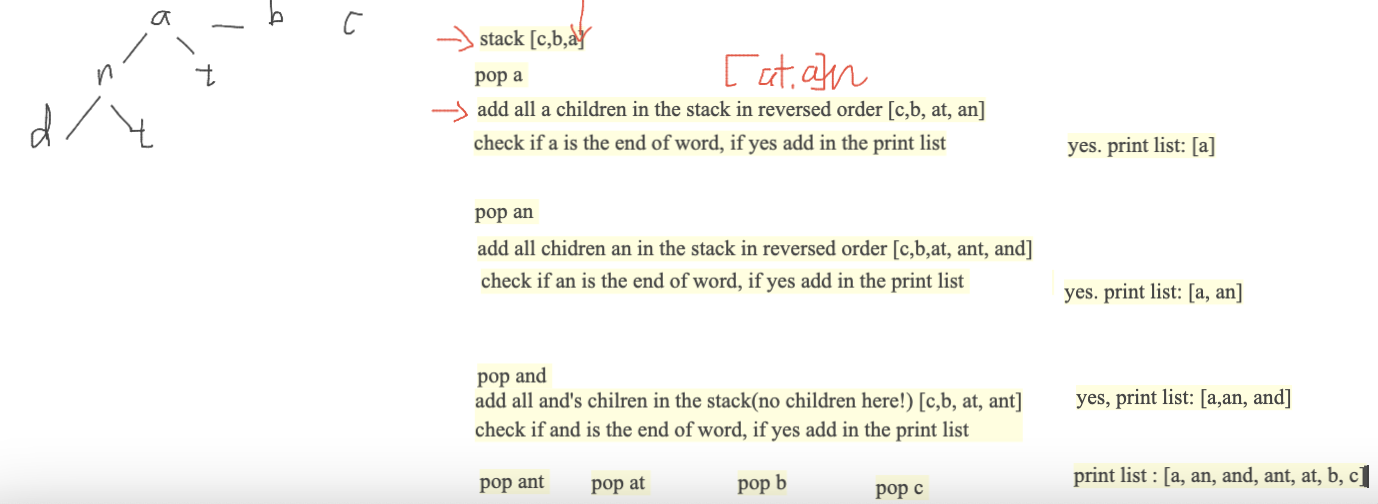

## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

#### Q4 modification 
1. Create frequency as a new property and include this information whenever insert a new word. 
2. Create a new node list for alphabetical_list in order to access the information about frequency.
When I call the list that include 
3. Modify k_common_words method by heapq module

In [188]:
import heapq

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        self.child = []
        self.parent  = None 
        self.char = char
        self.end_word = False #check if it is end of word
        self.freq = 0 #Q4 modification: the freqency the word 

      
class Trie_Q4():
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.word_list = word_list 
        self.root = Node(None) #an empty root node (no character inside)
        if self.word_list: #if there is words in the wordlist 
          for word in self.word_list:
            #This code doesn't work for the speech list, because they have different way of defining identical 
            # word = word.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            # .replace(";", "").replace("*", "").replace(';','').replace('\'','')
            self.insert(word) 


    def insert(self, word):
      word = word.lower()
      current = self.root
      
      for i in range(len(word)): #iterate words
        node = Node(word[:i+1])
      #Q3 modification: including the prefix 
      #Example: hello: ['h', 'he', 'hel', 'hell', 'hello']
    
        no_child = True #flag to decide if we should insert a node in the tree
        if current.child: 
          no_child = False 
        
        if no_child == False: 
          has_letter = False #check if the letter is in the child list 
          for child in current.child: #loop through the child 
            if node.char == child.char: #check if the tree has the word 
              current = child #current node will the child that has the same character
              has_letter = True
              break   

        if (no_child == True) or (has_letter == False): #if no child in the list, or the letter is not in the child list 
          current.child.append(node)
          node.parent = current
          current = node #update the current 
          

      #Q3 modification: change the property at current 
      current.end_word = True
      current.freq += 1

      

    def lookup(self, word):
      word = word.lower()
      current = self.root

      char_list = []
      for i in range(len(word)): 
        char_list.append(word[:i+1])
      
      i = 0
      while i < len(char_list): 
        if current.child: #check there is child inside current 
          for child in current.child:
            child_exist = False 
            if char_list[i] == child.char: #check if the charater exists in the child list
              current = child #update current 
              i+=1
              child_exist = True  
              break

          if child_exist == False:
            return False  


      #check if it is the end of the word
      if current.end_word == True: 
        return True
      return False 


    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        
        
        
        current_list = self.root.child #create the base list that include all root's children


        output_list = [] #alphabetical list we want to output 
        alphabetical_node_list = []

        while current_list: 
          current = current_list.pop() #pop out every element in the list 
          if current.end_word == True:
            output_list.append(current.char)
            alphabetical_node_list.append(current)
          
          if current.child: #if the current node has a child 
            current_list.extend(current.child)

        

        return sorted(output_list), alphabetical_node_list #sort the output list 

    #k most common: sort method 
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.
        """
        k_most_common_list = []
        alphabetical_node_list = self.alphabetical_list()[1]

        for node in alphabetical_node_list:
          k_most_common_list.append((node.char, node.freq))


        for word, freq in k_most_common_list: 
          k_most_common_list.sort(key=lambda tup: tup[0]) #sort alphebetically 
          k_most_common_list.sort(reverse = True, key=lambda tup: tup[1]) #sort by frequency 
          #sort by freq(the second value of the tuple) 
        

        return k_most_common_list[:k] #return the k common


    #k most common: heap method 
    def k_most_common_heap(self, k):
      k_most_common_heap = []
      k_most_common_output = []
      alphabetical_node_list = self.alphabetical_list()[1]
      
      for node in alphabetical_node_list:
        my_tuple = (-node.freq, node.char)
        heapq.heappush(k_most_common_heap,(my_tuple))

      for _ in range(k):
        neg_freq, char = heapq.heappop(k_most_common_heap)
        k_most_common_output.append((char,-neg_freq))

      # Extra thoughts: pick out all elements if their frequency are the same 
      last_element = k_most_common_output[-1]
      
      while k_most_common_heap:
         potential = k_most_common_heap.pop(0)
         if last_element[1] == -potential[0]: #if last elements' freq = potential's freq 
           neg_freq, char = potential
           k_most_common_output.append((char,-neg_freq)) #append the potential 
         else: 
           break 
    
      return k_most_common_output



wordbank = 'havd ha hav ha hud luck ha luck!'.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie_Q4(wordbank)
print('TEST')
trie.k_most_common(3)

TEST


[('ha', 3), ('luck', 2), ('hav', 1)]

In [189]:
# depending on your choice of approach, 
# uncomment one of the lines in the for loop to initiate the test

# you might have to run 'pip install requests' before running this cell 
# since you're downloading data from an online resource 
# please note this might take a while to run

# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel


from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    
    trie = Trie_Q4(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
        
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg
        
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.
#My code works but I don't know why when I run the same trie.k_most_common(num) 
#it gives me a blank list sometimes. 

#### Test Case:
1. Tongue Twister: Since it is not a speech, it shows less Be verb or conjunction words.
2. Emma Waston's speech in UN about Gender inequality: women and man appear frequently. 
3. Job rejection letter: I'm curious about what people usually say in job rejection letter. It turns out be nothing special even though I usually rememeber some key words like regret or unfortunately. I sense my emotion bias when being rejected. 
4. Special test case for k_most_common_heap(): First, building up a heap tree takes O(n), so we don't need to sort the list which takes O(nlogn). Second, I create some revision to include words that have the same frequency. Even though we only need k words, but I think if the there are multiple words that have the same element, we should still print them out. I don't think a word is more important than the other merely because of their alphabetical order. Yet, the output doesn't follow an alphabetical order. 

In [13]:
#Test 1: Tongue Twister 
word_bank = 'Peter Piper picked a peck of pickled peppers\
A peck of pickled peppers Peter Piper picked\
If Peter Piper picked a peck of pickled peppers\
Where’s the peck of pickled peppers Peter Piper picked?'.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').split(' ')
trie = Trie_Q4(word_bank)
trie.k_most_common(5)

[('of', 4), ('peck', 4), ('peter', 4), ('pickled', 4), ('piper', 4)]

In [1]:
#Test 2: Emma Watson's speech in UN about Gender inequality 
from google.colab import files
uploaded = files.upload()

Saving emma.rtf to emma.rtf


In [12]:
with open('emma.rtf', 'r') as file:
    emma_speech = file.read()

word_bank = emma_speech.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').split(' ')
trie = Trie_Q4(word_bank)
trie.k_most_common(20)

[('to', 45),
 ('the', 44),
 ('i', 41),
 ('and', 34),
 ('is', 29),
 ('be', 26),
 ('of', 23),
 ('that', 22),
 ('a', 20),
 ('it', 18),
 ('for', 17),
 ('my', 17),
 ('we', 16),
 ('have', 15),
 ('in', 15),
 ('men', 15),
 ('as', 14),
 ('if', 12),
 ('women', 12),
 ('not', 11)]

In [26]:
#Test 3: Job rejection letter 
rejection = 'Thank you for your application to the Data and Computing Summer Lab at the Center \
 for Data and Computing (CDAC). After careful consideration, \
 we regret that we are unable to make you an offer of admission at this time. \
 The applications we received were the strongest to date, \
 and thus made our review process even more selective. \
 We acknowledge the time and thoughtful consideration you have given your application. \
 While we cannot provide individual feedback on your application, \
 we would strongly encourage you to continue steadfast in pursuing your interests \
 in computation and data science. We hope you remain safe and \
 healthy during this time.'.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').split(' ')

trie = Trie_Q4(rejection)
trie.k_most_common(10)


[('we', 7),
 ('and', 6),
 ('the', 5),
 ('you', 5),
 ('to', 4),
 ('your', 4),
 ('application', 3),
 ('data', 3),
 ('time', 3),
 ('at', 2)]

In [153]:
#Test 4: Special test case for k_most_common_heap(). Output words that share the same frequency 
word_bank = 'Peter Piper picked a peck of pickled peppers\
A peck of pickled peppers Peter Piper picked\
If Peter Piper picked a peck of pickled peppers\
Where’s the peck of pickled peppers Peter Piper picked?'.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').split(' ')
trie = Trie_Q4(word_bank)
trie.k_most_common_heap(2)


[('of', 4), ('peck', 4), ('peter', 4), ('pickled', 4), ('piper', 4)]

## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

#### Code modification
1. create a starting node for alphabetical_list and k_most_common: I want to combine the two methods in the class. 



In [180]:
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        
        self.child = []
        self.parent  = None 
        self.char = char
        self.end_word = False #check if it is end of word
        self.freq = 0 #the freqency the word is mentioned  

      
class Trie_Q5():
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.word_list = word_list 
        self.root = Node(None) #an empty root node (no character inside)
        if self.word_list: #if there is words in the wordlist 
          for word in self.word_list:
            self.insert(word) 


    def insert(self, word):
      word = word.lower()
      current = self.root
      
      for i in range(len(word)): #iterate words
        node = Node(word[:i+1])
      #Modification: including the prefix 
      #Example: hello: ['h', 'he', 'hel', 'hell', 'hello']
    
        no_child = True #flag to decide if we should insert a node in the tree
        if current.child: 
          no_child = False 
        
        if no_child == False: 
          has_letter = False #check if the letter is in the child list 
          for child in current.child: #loop through the child 
            if node.char == child.char: #check if the tree has the word 
              current = child #current node will the child that has the same character
              has_letter = True
              break   

        if (no_child == True) or (has_letter == False): #if no child in the list, or the letter is not in the child list 
          current.child.append(node)
          node.parent = current
          current = node #update the current 
          

      # Modification: change the property at current 
      current.end_word = True
      current.freq += 1

      

    def lookup(self, word):
      word = word.lower()
      current = self.root

      char_list = []
      for i in range(len(word)): 
        char_list.append(word[:i+1])
      
      i = 0
      while i < len(char_list): 
        if current.child: #check there is child inside current 
          for child in current.child:
            child_exist = False 
            if char_list[i] == child.char: #check if the charater exists in the child list
              current = child #update current 
              i+=1
              child_exist = True  
              break

          if child_exist == False:
            return False  


      #check if it is the end of the word
      if current.end_word == True: 
        return True
      return False 


    def alphabetical_list(self, start_node = None):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        
        
        if start_node == None: #check if there is specific starting node, if not we start from root node 
          current_list = self.root.child #create the base list that include all root's children
        else: #or else, we create alphabetical_list for that specific starting node. 
          current_list = [start_node]


        output_list = [] #alphabetical list we want to output 
        alphabetical_node_list = []

        while current_list: 
          current = current_list.pop() #pop out every element in the list 
          if current.end_word == True:
            output_list.append(current.char)
            alphabetical_node_list.append(current)

          
          if current.child: #if the current node has a child 
            current_list.extend(current.child)
        return sorted(output_list), alphabetical_node_list #sort the output list 


    def k_most_common(self, k, start_node = None):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.
        """
        
        
        k_most_common_list = []
        alphabetical_node_list = self.alphabetical_list(start_node)[1]
        if k > len(alphabetical_node_list):
          print('K is bigger than than the length of list!')

        for node in alphabetical_node_list:
          k_most_common_list.append((node.char, node.freq))


        
        k_most_common_list.sort(key=lambda tup : tup[0]) #sort alphebetically 
        k_most_common_list.sort(reverse = True, key=lambda tup: tup[1]) #sort by frequency 
        #sort by freq(the second value of the tuple) 
        

        return k_most_common_list[:k] #return the k common
    
    #k most common: heap method 
    def k_most_common_heap(self, k):
      k_most_common_heap = []
      k_most_common_output = []
      alphabetical_node_list = self.alphabetical_list()[1]
      
      for node in alphabetical_node_list:
        my_tuple = (-node.freq, node.char)
        heapq.heappush(k_most_common_heap,(my_tuple))

      for _ in range(k):
        neg_freq, char = heapq.heappop(k_most_common_heap)
        k_most_common_output.append((char,-neg_freq))

      # Extra thoughts: pick out all elements if their frequency are the same 
      last_element = k_most_common_output[-1]
      
      while k_most_common_heap:
         potential = k_most_common_heap.pop(0)
         if last_element[1] == -potential[0]: #if last elements' freq = potential's freq 
           neg_freq, char = potential
           k_most_common_output.append((char,-neg_freq)) #append the potential 
         else: 
           break 
    
      return k_most_common_output

    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        prefix = prefix.lower()
        current = self.root

        prefix_list = []
        for i in range(len(prefix)): 
          prefix_list.append(prefix[:i+1])
      
        i = 0
        #Check if the child exist and find the location of the prefix 
        while i < len(prefix_list): 
          if current.child: #check there is child inside current 
            for child in current.child:
              child_exist = False 
              if prefix_list[i] == child.char: #check if the charater exists in the child list
                current = child #update current 
                child_exist = True  
                break
            i+=1
              


        if child_exist == True:
          return self.k_most_common(1, current)[0][0] #first element in the list, and only include the word 
        else: 
          return str('Return prefix: ')+prefix 



wordbank = 'havd ha hav ha hud luck ha luck lucy luca luca luu!'.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie_Q5(wordbank)
print('TEST')
print(trie.autocomplete('lu'))
print(trie.autocomplete('ha'))
print(trie.autocomplete('hah'))

TEST
luca
ha
Return prefix: hah


In [172]:
# depending on your choice of approach, uncomment one of the lines below
# The Complete Works of William Shakespeare is a LARGE book, 
# so the code might take a while to run

from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]



SH_trie = Trie_Q5(SH_just_words)

In [173]:
assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

#### Test Case
1. Tongue Twister: I check it with k_most_common word. They shows that my autocomplete machine is correct. 
2. Song from Troye Sivan -- The good side: I want to know if I can autocomplete some important words in the song through my autocomplete. It looks good! 
3. 2 Job rejection letters: I want to know if I type u if it will give me unfortunately and get regret for r. It shows my assumption is wrong. Both u goes to unable and one r is for received and the other r is for reapplying. The reason is because I feel drafting a rejection letter is quite standard. If a company need to write many different rejection letters, autocomplete machine can be helpful. 

In [156]:
#Test 1: Tongue Twister 
word_bank = 'Peter Piper picked a peck of pickled peppers\
A peck of pickled peppers Peter Piper picked\
If Peter Piper picked a peck of pickled peppers\
Where’s the peck of pickled peppers Peter Piper picked?'.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').split(' ')
trie = Trie_Q5(word_bank)
print(trie.autocomplete('p'))
print(trie.autocomplete('pi'))
print(trie.autocomplete('pet'))

peck
pi
peter


In [22]:
#Test 2: Song from Troye Sivan -- The good side 
song = 'I got the good side of things \
Left you with both of the rings \
My fingers danced \
And swayed in the breeze \
The change in the wind took you down to your knees \
I got the good side of you \
Sent it out into the blue \
The people danced \
To the sound of your heart \
The world sang along to it falling apart \
But I sympathise \
And I recognise \
And baby, I apologise \
That I got the good side \
The good side of things \
I got the good side of life \
Travelled the universe twice \
So many thoughts I wanted to share \
But I didnt call because it wouldnt be fair \
Then I got the good side of new \
Found arms to fall right into \
I know how it looked \
It wasnt the plan \
And someday I hope that youll understand \
I sympathise \
And I recognise \
And baby, I apologise \
That I got the good side \
The good side of things \
Im sure well meet in the spring \
And catch up on everything \
Ill say Im proud of all that youve done\
You taught me the ropes, and you taught me to love \
But I sympathise \
And I recognise \
And baby, I apologise\
That I got the good side\
The good side of things\
Sympathise \
Recognise \
Apologise \
That I got the good side \
The good side of things'.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').split(' ')

trie = Trie_Q5(song)
print(trie.autocomplete('g'))
print(trie.autocomplete('s'))
print(trie.autocomplete('sy'))
print(trie.autocomplete('r'))
print(trie.autocomplete('ap'))

good
side
sympathise
recognise
apologise


In [47]:
 #Test 3 - 1: Job rejection letter 
rejection = 'Thank you for your application to the Data and Computing Summer Lab at the Center \
 for Data and Computing (CDAC). After careful consideration, \
 we regret that we are unable to make you an offer of admission at this time. \
 The applications we received were the strongest to date, \
 and thus made our review process even more selective. \
 We acknowledge the time and thoughtful consideration you have given your application. \
 While we cannot provide individual feedback on your application, \
 we would strongly encourage you to continue steadfast in pursuing your interests \
 in computation and data science. We hope you remain safe and \
 healthy during this time.'.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').split(' ')

trie = Trie_Q5(rejection)
print(trie.autocomplete('u'))
print(trie.autocomplete('r'))
print(trie.autocomplete('ap'))
print(trie.autocomplete('reg'))

unable
received
application
regret


In [181]:
#Test 3 - 2: Job rejection letter 
rejection_2 = 'Our admissions team has completed its review process, \
and we are very sorry to inform you that we are unable to offer you admission to \
this DS4A / Empowerment cohort. \
We received thousands of applicants from talented students and professionals. \
There were many more qualified applicants than we could admit, yourself included. \
We greatly appreciate the time you put into your application and wish we could accept \
every applicant to this cohort.\
That being said, we will have another DS4A / Empowerment cohort this fall, \
and we welcome you to apply again. To meet the needs of increasing applicants, \
we will continue to scale the program to train more Fellows. \
We will offer a “fast track” application process for all prior applicants, \
to make re-applying easier and also prioritize your application because of the commitment you’ve shown.\
To continue your learning and better prepare for the next application cycle, \
we have developed this guide of curated resources to help jumpstart your development \
as a data-fluent individual. We hope that you find this resource helpful.\
Furthermore, we will be organizing free monthly webinars featuring data science \
leaders from companies like Twitter, Twitch, Lyft, Two Sigma, and others. \
These webinars give practical tips on building a data-driven career. \
To stay up-to-date on these events, we invite you to follow us on LinkedIn.\
Finally, we’ll also host a free, introductory session with Dr. Natesh Pillai \
(DS4A Lead Instructor; Chief Scientist, Correlation One; and Tenured Professor, Harvard University)\
 on the Applications of AI. The session will be held Friday, April 2nd at 6 PM EST \
 and we encourage you to register HERE. \
We truly appreciate your interest in the Data Science for All / Empowerment program \
and hope to stay in touch'.replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').split(' ')

trie = Trie_Q5(rejection_2)
print(trie.autocomplete('r'))
print(trie.autocomplete('regr')) #regret is not in the prefix
print(trie.autocomplete('u'))
print(trie.autocomplete('ap'))
print(trie.autocomplete('appr'))

re-applying
Return prefix: regr
unable
applicants
appreciate


#### My autocomplete method -- k_most_common sorting
1. First find the node that character is same as the prefix in the trie tree. This cost O(h*l). h is the length of prefix. 
2. After finding the prefix, I put it into k_most common. The time complexity I need to take into account is this code. 

For running through the list, it takes $\theta(n)$. 
```
for node in alphabetical_node_list:
          k_most_common_list.append((node.char, node.freq))
```
For sorting, it takes, O(nlogn) *2 -> O(nlogn) 

```
k_most_common_list.sort(key=lambda tup: tup[0]) #sort alphebetically 
k_most_common_list.sort(reverse = True, key=lambda tup: tup[1]) #sort by frequency 
```
Combing all three together, it is O(nlogn) is the largest, we only need to consider O(nlogn). 

---
#### Another autocomplete method -- k_most_common_heap
I can also revise my k_most_common_heap to conduct autocomplete. The time complexity for this method will be $\theta(n)$ for running the alphabetical_node_list and $\theta(k)$ for popping out the k most frequent characters. 

```
for node in alphabetical_node_list:
        my_tuple = (-node.freq, node.char)
        heapq.heappush(k_most_common_heap,(my_tuple))

for _ in range(k):
    neg_freq, char = heapq.heappop(k_most_common_heap)
    k_most_common_output.append((char,-neg_freq))
```
This method will decrease my time complexity from O(nlogn) to O(n). However, since my heap doesn't follow aphabetical order, it will suffer some problems for inaccuracy. I think it is okay because when we try to autocomplete, I do think there should be multiple options(words with same frequency) to choose from.


### HC application
1. #conformity: I tried to came up with most of solutions myself rather than finding good methods online, I spent tons of time producing inefficient codes. I was affected by my endowment effect. For instance, during my disucssion with people, I know I could have changed my trie tree into index method, so I can have a alphabetical list. Yet, I wanted to preserve my own trie creation, so I didn't change it. The bad setup structure restricted my algorithms to have big time complexity. It bugged me a lot because it took too much time for sorting in k_most_common and autocomplete. 

2. #selfawareness: I knew I cannot think of all ideas myself, so before coding, I dicussed approaches with other people. Though our solutions might not be the best, I still believed comparing our rought solutions with experts' made me grow much more. In addition, I sometimes felt I was two times slower than in coding other people. Instead of criticizing myself, I start to reframe the thought as "what can I learn from their good thoughts and good methods?"

3. #designthinking: I heavily applied design thinking in this assignmentm because I felt my method was suboptimal. I tried different methods to optimize my code iteratively. 
- For instance, I create a alphabetical node method so I could access node when creating k_most_common method. I further made it as another output of alphabetical_list to save the process of creating and calling it.(I delete the old codes) 
- In addition, I also brainstormed different ways such as create an alphabetical tree to decrease my time complexity. 
- Lastly, I created heap method.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
